# Section C

## Imports and reading dataset

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, roc_curve, auc, recall_score, f1_score, precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
%matplotlib inline

In [18]:
# from google.colab import drive
# drive.mount('/content/drive')
%cd "/content/drive/My Drive/ML Assignments/Assignment 1/DryBeanDataset"

/content/drive/My Drive/ML Assignments/Assignment 1/DryBeanDataset


In [19]:
# reading, shuffling and removing duplicates from the dataset
df = pd.read_csv("Dry_Bean_Dataset.csv")
df = df.sample(frac=1).reset_index(drop=True)
y_col = df.drop(columns=['Class']).columns

In [20]:
# cheecking for duplicates and removing them
df.duplicated().sum()
df = df.drop_duplicates().reset_index(drop = True)

In [ ]:
#checking for null values
df.isnull().sum()

## Part a

#### We infer the following from the class distribution
- Bombay occurs the least number of times
- Dermason occurs the most number of times

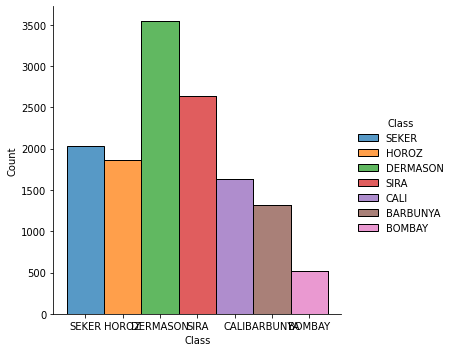

In [226]:
sns.displot(df, x = "Class", hue = "Class", multiple = "stack")

## Part b

#### The following plot gives us a sense of the skewness of the data and the outliers in the distribution.

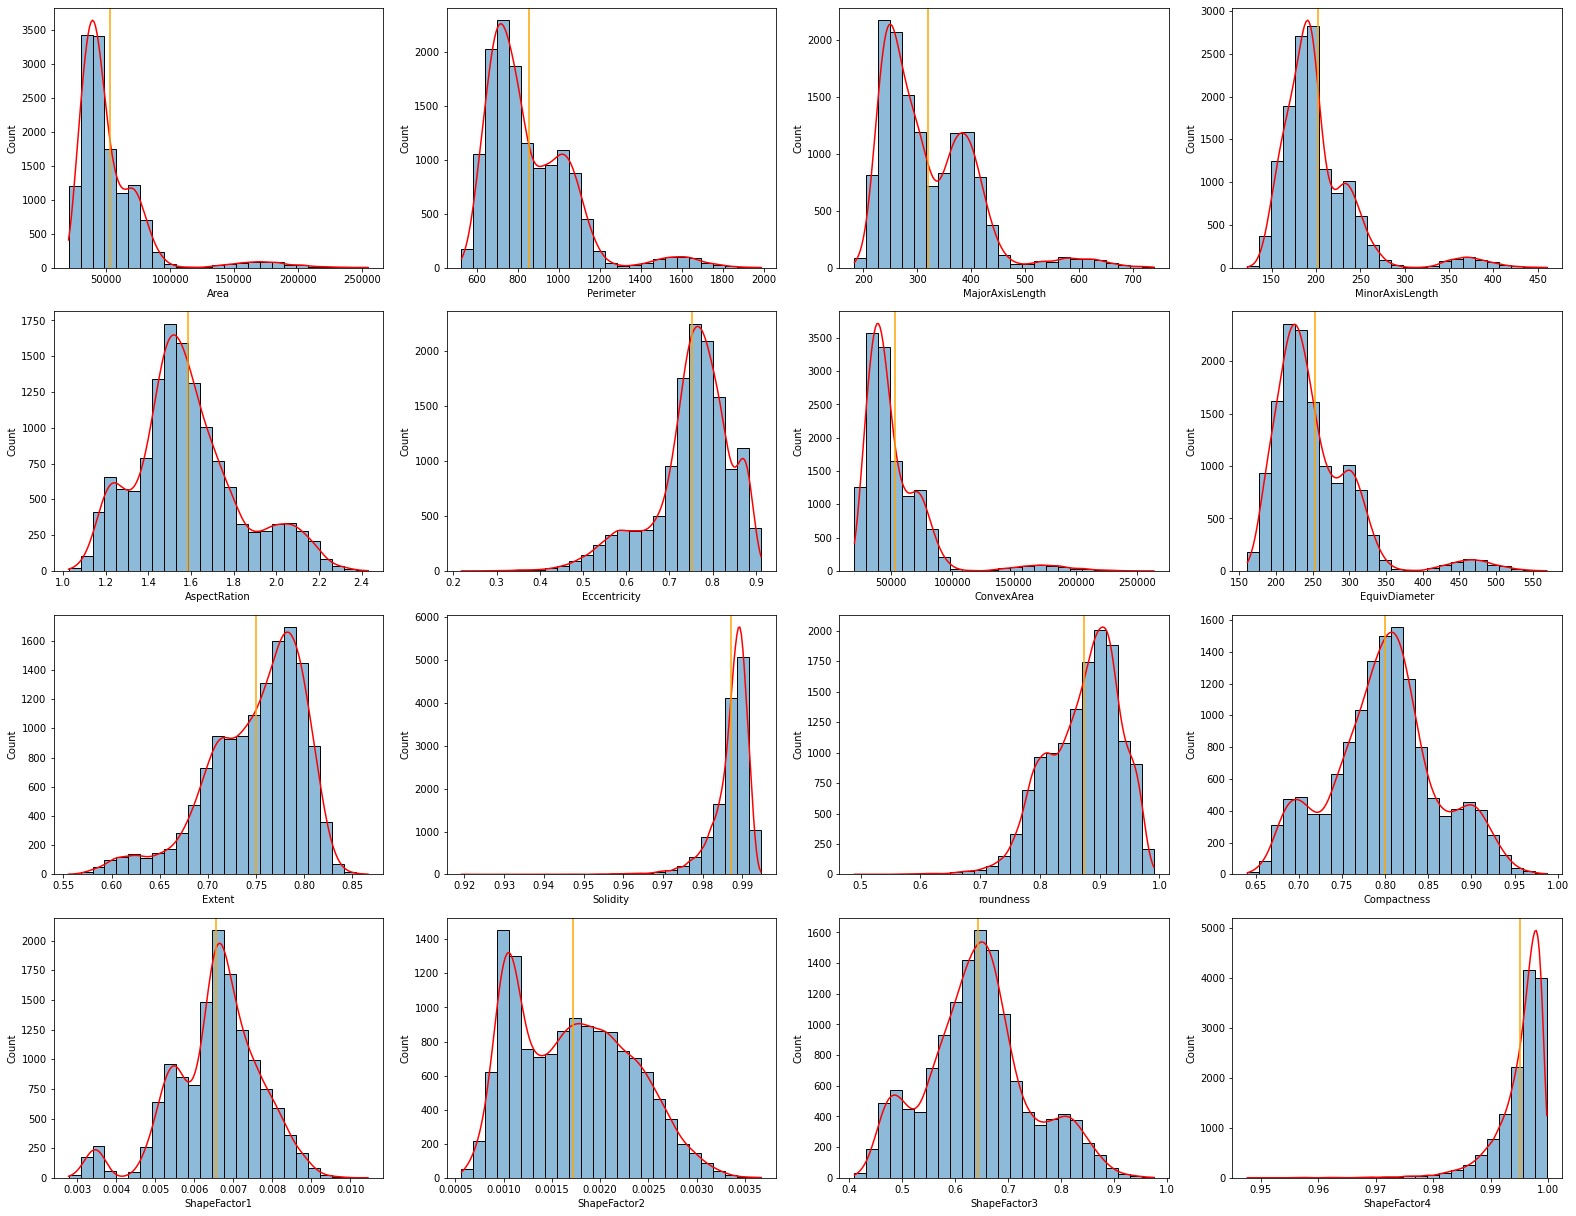

In [19]:
fig, axes = plt.subplots(4, 4, figsize=(22, 17)) # size of plot 
for x, plot in zip(y_col, axes.flatten()):
    graph=sns.histplot(df[x], bins=25, kde=True, ax=plot) # type of plot
    graph.lines[0].set_color('red') 
    graph.axvline(x=df[x].mean(), color='orange', label='Mean') # ssetting the mean line

#### We infer the following qualities about the data through the violin plot.
- Some features are very skewed, characterized by their long tails.
- Bombay class differs greatly from other classes in that it has a larger Area, Perimeter, and Minor/Major AxisLength
- Barbunaya and Cali have similar distributions. The same behaviour is exhibited by Dermason and Sira


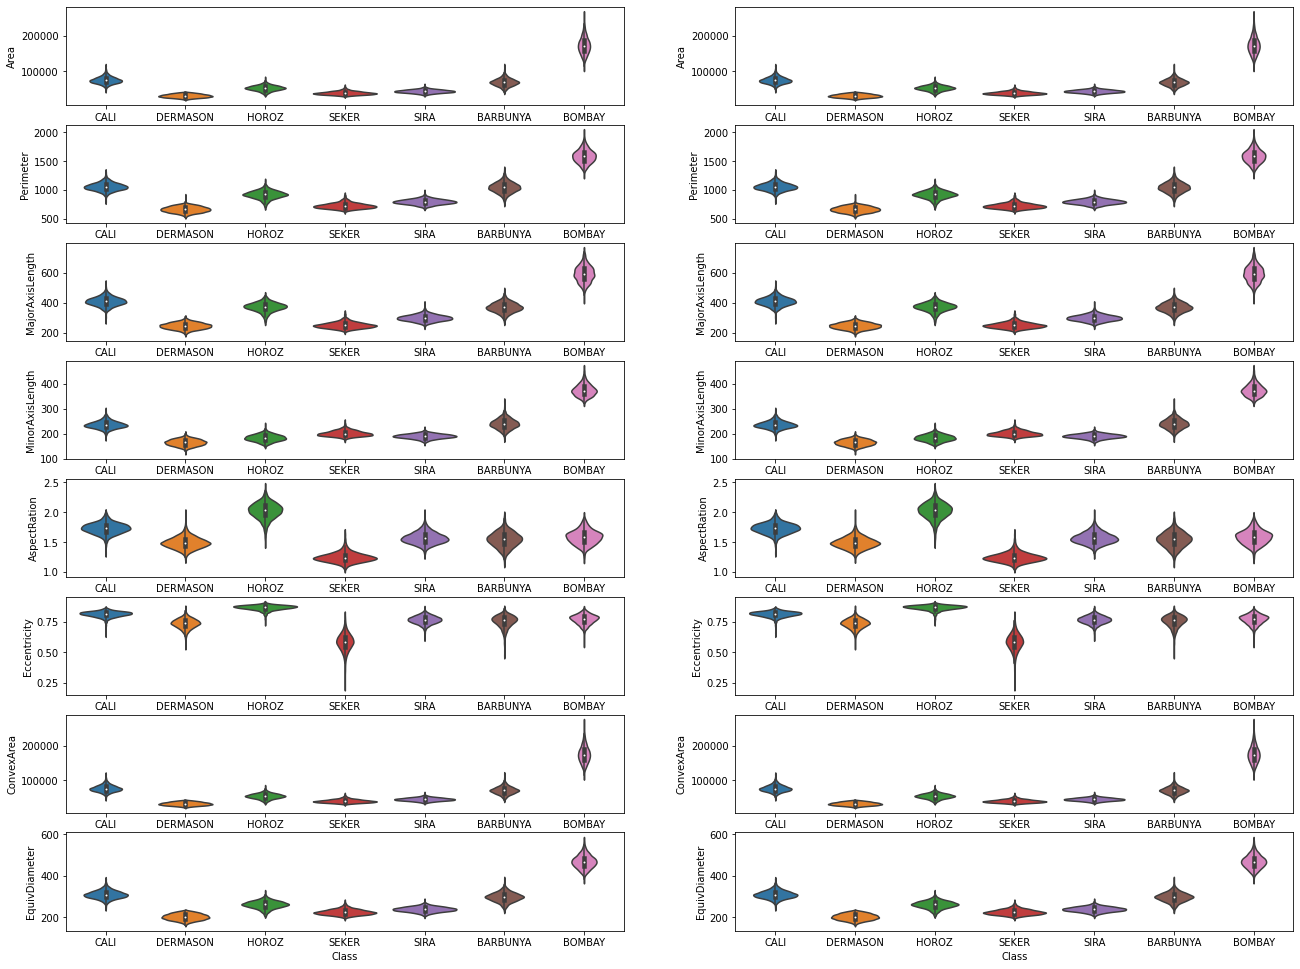

In [14]:
# violin plot
fig, axes = plt.subplots(8, 2, figsize = (22, 17))
for i in range(len(y_col)//2):
    sns.violinplot(data=df, x='Class', y=y_col[i], ax = axes[i, 0])
    sns.violinplot(data=df, x='Class', y=y_col[i], ax = axes[i, 1])

#### We can make the following observations thorugh the pair plot
- There is a lot of overlap between the Dermason and Sira classes
- Bombay is separated from other classes in several features

In [ ]:
sns.pairplot(df, hue="Class");

Output hidden; open in https://colab.research.google.com to view.

#### There are a lot of linearly correlated features, as seen in the following heatmap

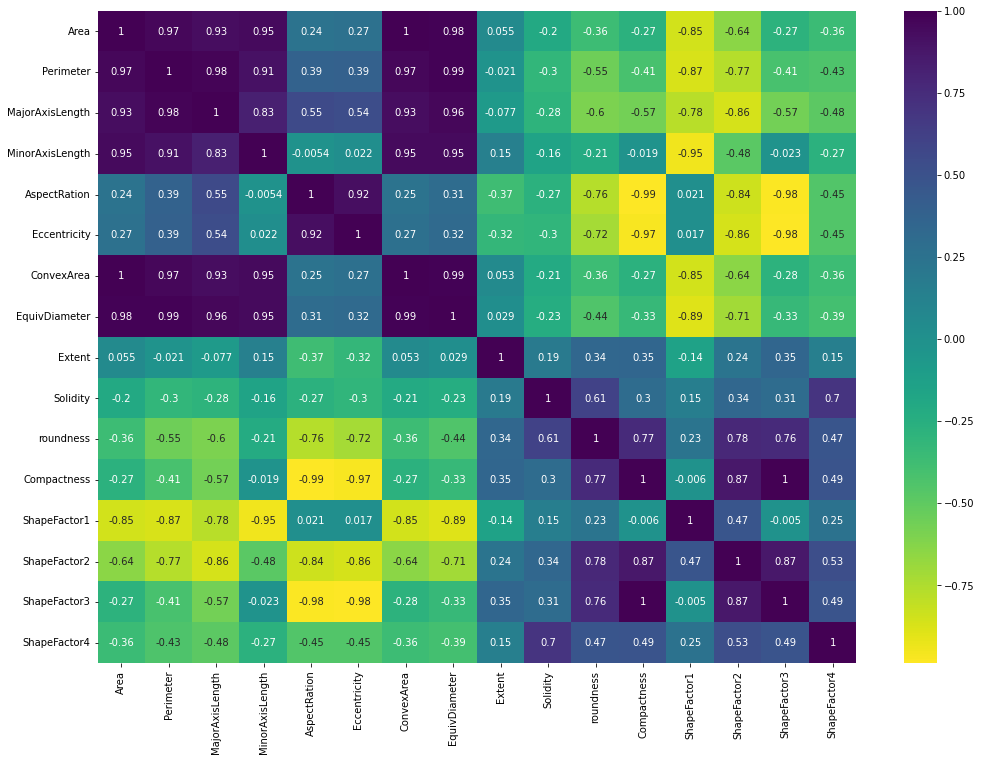

In [197]:
plt.figure(figsize = [17, 12])
sns.heatmap(df.corr(),annot = True, cmap='viridis_r');

## Part c

In [21]:
# separating X and y
X = df.iloc[:, :16] 
y = df.iloc[:, 16:17]
# scaling X
X = StandardScaler().fit_transform(X)

In [219]:
# using TSNE
tsne = TSNE(n_components=2, perplexity=25)
z = tsne.fit_transform(X) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


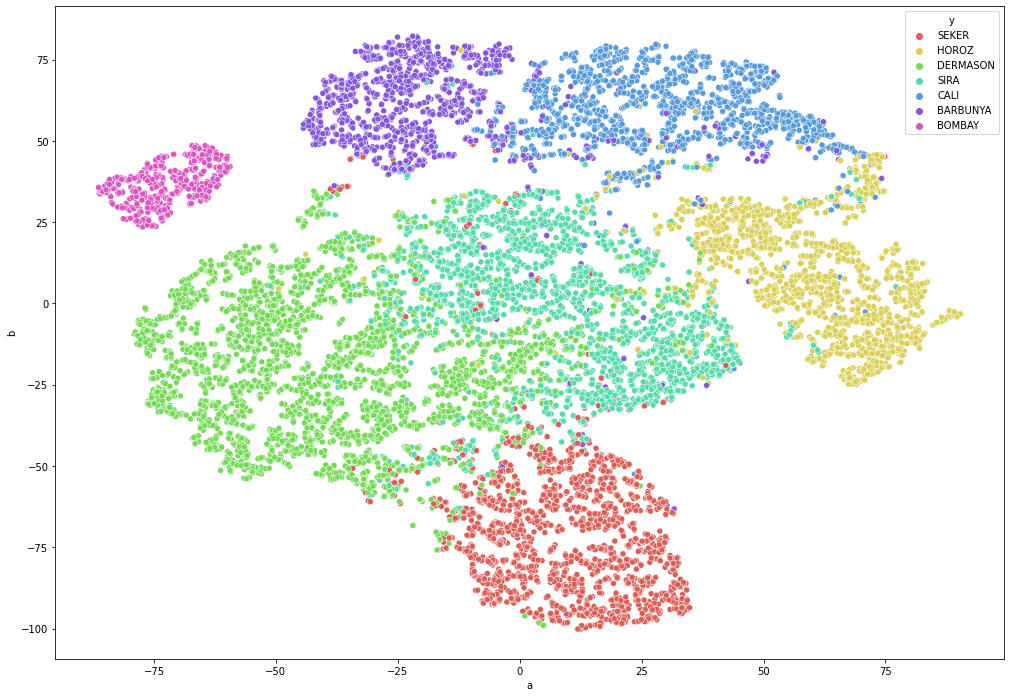

In [220]:
# plotting TSNE 
df_temp = df.copy(deep=True)
df_temp["y"] = y
df_temp["a"] = z[:, 0]
df_temp["b"] = z[:, 1]
plt.figure(figsize=(17, 12))
sns.scatterplot(x="a", y="b", hue="y", palette=sns.color_palette("hls", len(df_temp["y"].unique())), data=df_temp)

## Part d

In [22]:
# splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

### Gaussian Naive Bayes

In [221]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train.values.ravel()).predict(X_test) # fit and predict
print("Gaussian Naive Bayes model accuracy(in %):", accuracy_score(y_test, y_pred)*100)
print("Gaussian Naive Bayes model precision(in %):", precision_score(y_test, y_pred, average="weighted")*100)
print("Gaussian Naive Bayes model recall(in %):", recall_score(y_test, y_pred, average="weighted")*100)

Gaussian Naive Bayes model accuracy(in %): 89.34998163789938
Gaussian Naive Bayes model precision(in %): 89.44691361783833
Gaussian Naive Bayes model recall(in %): 89.34998163789938


### Bernoulli Naive Bayes

In [222]:
bnb = BernoulliNB()
y_pred_1 = bnb.fit(X_train, y_train.values.ravel()).predict(X_test) # fit and predict
print("Bernoulli Naive Bayes model accuracy(in %):", accuracy_score(y_test, y_pred_1)*100)
print("Bernoulli Naive Bayes model precision(in %):", precision_score(y_test, y_pred_1, average="weighted")*100)
print("Bernoulli Naive Bayes model recall(in %):", recall_score(y_test, y_pred_1, average="weighted")*100)

Bernoulli Naive Bayes model accuracy(in %): 71.31839882482555
Bernoulli Naive Bayes model precision(in %): 72.61726000532246
Bernoulli Naive Bayes model recall(in %): 71.31839882482555


## Part e

In [25]:
def pca(n):
    pca = PCA(n_components=n).fit(X_train)
    # principalDf = pd.DataFrame(data = pca) 
    X_train_new = pca.transform(X_train)
    X_test_new = pca.transform(X_test)
    pca_gnb = GaussianNB() # applying PCA on Gaussian navie Bayes
    y_pred_pca = pca_gnb.fit(X_train_new, y_train.values.ravel()).predict(X_test_new) # fir and predict
    print(f"PCA model accuracy(in %) for n = {n}:", accuracy_score(y_test, y_pred_pca)*100)
    print(f"PCA model precision(in %) for n = {n}:", precision_score(y_test, y_pred_pca, average="weighted")*100)
    print(f"PCA model recall(in %) for n = {n}:", recall_score(y_test, y_pred_pca, average="weighted")*100)
    print(f"PCA model f1 score(in %) for n = {n}:", f1_score(y_test, y_pred_pca, average="weighted")*100)
    print()

In [26]:
for i in range(4, 14, 2):
    pca(i)

PCA model accuracy(in %) for n = 4: 87.0062753783684
PCA model precision(in %) for n = 4: 87.16021324806914
PCA model recall(in %) for n = 4: 87.0062753783684
PCA model f1 score(in %) for n = 4: 86.90930051552206

PCA model accuracy(in %) for n = 6: 89.11037283130307
PCA model precision(in %) for n = 6: 89.53578296026893
PCA model recall(in %) for n = 6: 89.11037283130307
PCA model f1 score(in %) for n = 6: 89.19194994959248

PCA model accuracy(in %) for n = 8: 89.03654485049833
PCA model precision(in %) for n = 8: 89.72577457079089
PCA model recall(in %) for n = 8: 89.03654485049833
PCA model f1 score(in %) for n = 8: 89.14878509619865

PCA model accuracy(in %) for n = 10: 88.33517903285345
PCA model precision(in %) for n = 10: 89.5965329244226
PCA model recall(in %) for n = 10: 88.33517903285345
PCA model f1 score(in %) for n = 10: 88.46856405249926

PCA model accuracy(in %) for n = 12: 88.26135105204872
PCA model precision(in %) for n = 12: 89.48966576549992
PCA model recall(in %) f

## Part f

In [227]:
def plot_multiclass_roc():
    n = len(df["Class"].unique())
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    df_temp = df.copy(deep=True)
    X = df_temp.iloc[:, :16]
    X = StandardScaler().fit_transform(X)
    y = df_temp.iloc[:, 16:]
    # encoding y
    y_encoded = LabelEncoder().fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y, shuffle=True)
    # using OVR Classifer to plot the curves
    clf = OneVsRestClassifier(GaussianNB())
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)
    # saving output for every class
    for i in range(n):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_pred[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting roc for each class
    fig, ax = plt.subplots(figsize=(17, 10))
    ax.plot([0, 1], [0, 1], "k--")
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title('ROC Curves')
    for i in range(n):
        ax.plot(fpr[i], tpr[i], label="ROC curve (area = %0.2f) for label %i" % (roc_auc[i], i))
    ax.legend(loc="best")
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


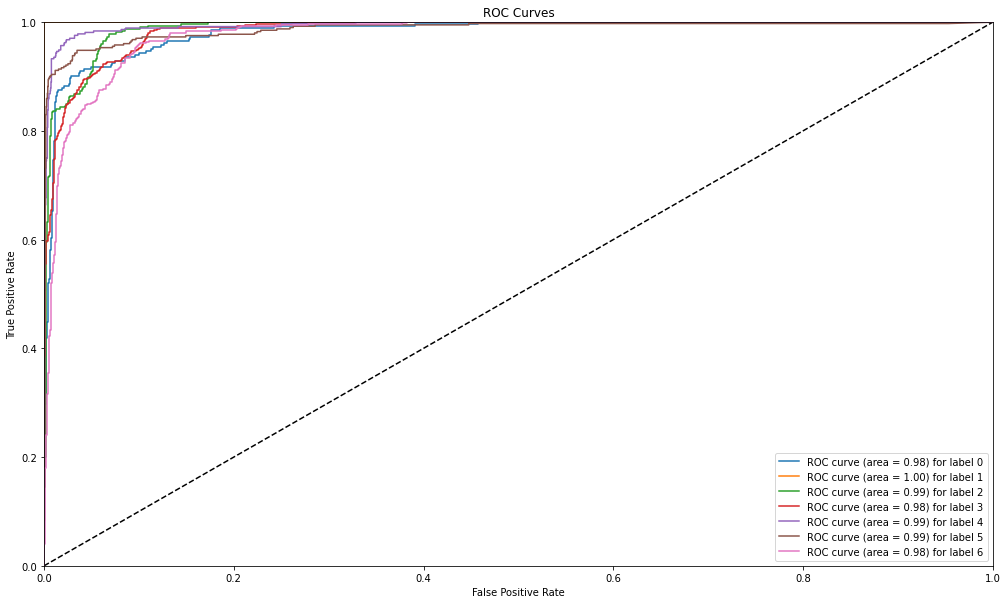

In [228]:
plot_multiclass_roc()

## Part g

In [213]:
lr = LogisticRegression(max_iter=500, multi_class="multinomial")
y_pred = lr.fit(X_train, y_train.values.ravel()).predict(X_test)
print("Logistic Regression model accuracy(in %):", accuracy_score(y_test, y_pred)*100)
print("Logistic Regression model precision(in %):", precision_score(y_test, y_pred, average="weighted")*100)
print("Logistic Regression model recall(in %):", recall_score(y_test, y_pred, average="weighted")*100)
print("Logistic Regression model f1 score(in %):", f1_score(y_test, y_pred, average="weighted")*100)

Logistic Regression model accuracy(in %): 92.06757253029747
Logistic Regression model precision(in %): 92.10942774245221
Logistic Regression model recall(in %): 92.06757253029747
Logistic Regression model f1 score(in %): 92.07675096660572
